# Исследование объявлений о продаже квартир

## Задача

Научиться определять рыночную стоимость объектов недвижимости

## Данные

Aрхив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире есть два вида данных:
* Заполненные пользователем вручную
* Полученные автоматически на основе картографических данных

### Импорт 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Предобработка данных 

In [3]:
def show_info(df:pd.DataFrame):
    display(df.head(5))
    df.info()
    display(df.describe().T)
    display(f'Количество дубликатов: {sum(df.duplicated())}')

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
show_info(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


'Количество дубликатов: 0'

**Гистограммы по кадому числовому толбцу таблицы** 

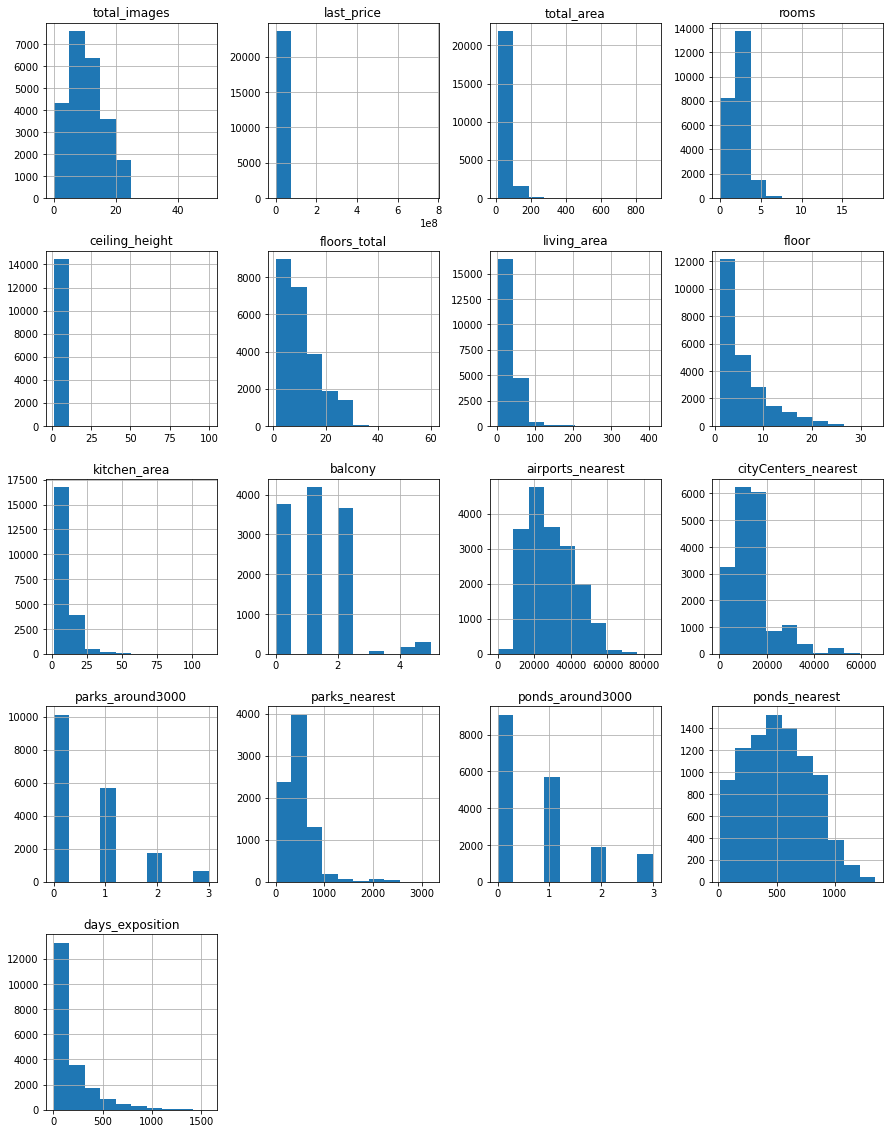

In [5]:
data.hist(figsize=(15,20));

Как видно, в таблице крайне много пропусков, а так же по гистограммам можно понять что присутствут аномальные значения

In [6]:
#Создал good_data что бы отфильровать и заполнить правильную таблицу
good_data = data.copy()
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [7]:
#Заменил значения в столбцах balcony на 0, по логике того что если информация отсутсвует то значит балкон отсутсвует
good_data['balcony'] = data['balcony'].fillna(0)
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [8]:
#Заменил значения в столбцах parks_around3000 и parks_nearest на 0, по логике того что если информация отсутсвует то значит парк отсутсвует
# good_data['parks_around3000'] = data['parks_around3000'].fillna(0)
# good_data['parks_nearest'] = data['parks_nearest'].fillna(0)
good_data[['parks_around3000', 'parks_nearest']] = good_data[['parks_around3000', 'parks_nearest']].fillna(0) 
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,0.0,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,NaN,289.0


In [9]:
#Перевел значения столбца first_day_exposition в правильный формат
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
good_data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

In [10]:
#Заменил значения в столбцах ponds_around3000 и ponds_nearest на 0, по логике того что если информация отсутсвует то значит пруд отсутсвует
# good_data['ponds_around3000'] = good_data['ponds_around3000'].fillna(0)
# good_data['ponds_nearest'] = good_data['ponds_nearest'].fillna(0)
good_data[['ponds_around3000', 'ponds_nearest']] = good_data[['ponds_around3000', 'ponds_nearest']].fillna(0) 
good_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,0.0,0.0,0.0,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,0.0,0.0,0.0,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,0.0,0.0,0.0,289.0


In [11]:
#Заменил значения в столбцах is_apartament на False, по логике того что если информация отсутсвует то значит это не апартаменты
good_data['is_apartment'] = good_data['is_apartment'].fillna('False')
print(good_data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00           2019-03-07      3   
1             7   3350000.0       40.40           2018-12-04      1   
2            10   5196000.0       56.00           2015-08-20      2   
3             0  64900000.0      159.00           2015-07-24      3   
4             2  10000000.0      100.00           2018-06-19      2   
5            10   2890000.0       30.40           2018-09-10      1   
6             6   3700000.0       37.30           2017-11-02      1   
7             5   7915000.0       71.60           2019-04-18      2   
8            20   2900000.0       33.16           2018-05-23      1   
9            18   5400000.0       61.00           2017-02-26      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8        False  ...   
1             NaN          11.0        18.60      1        False  ...   

In [12]:
#Заменил значения в столбцах airports_nearest на 0, по логике того что если информация отсутсвует то значит аэропорт отсутсвует
good_data['airports_nearest'] = good_data['airports_nearest'].fillna(0)
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.50,0.0,Тосно,0.0,NaN,0.0,0.0,0.0,0.0,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,0.0,NaN,0.0,0.0,0.0,0.0,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [13]:
#Заменил значения в столбцах cityCenter_nearest на 0
good_data['cityCenters_nearest'] = good_data['cityCenters_nearest'].fillna(0)
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,False,...,8.50,0.0,Тосно,0.0,0.0,0.0,0.0,0.0,0.0,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,False,...,NaN,0.0,село Рождествено,0.0,0.0,0.0,0.0,0.0,0.0,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [14]:
#Удалил пропуски в столбцах в которых их нельзя заменить 
good_data = good_data.dropna(subset=['locality_name']).reset_index(drop=True)
good_data = good_data.dropna(subset=['floors_total']).reset_index(drop=True)
#Перевел столбы с целочисленными значениями из float в int

int_col = [
    'floors_total'
    , 'balcony'
    , 'airports_nearest'
    , 'cityCenters_nearest'
    , 'parks_around3000'
    , 'ponds_around3000'
    , 'parks_nearest'
    , 'ponds_nearest'
    , 'days_exposition'
    , 'last_price'
]
good_data[int_col] = good_data[int_col].astype('int', errors='ignore')
good_data.shape

(23565, 22)

In [15]:
#Избавился от дубликатов в названиях населенных пунктов
names_to_replace = ['поселок', 'посёлок городского типа', 'городской посёлок', 'коттеджный посёлок']
for name in names_to_replace:
       good_data['locality_name'] = good_data['locality_name'].str.replace(name,'посёлок')
print(good_data.sort_values(by='locality_name')['locality_name'].unique())

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'деревня Агалатово' 'деревня Аро' 'деревня Батово'
 'деревня Бегуницы' 'деревня Белогорка' 'деревня Большая Вруда'
 'деревня Большая Пустомержа' 'деревня Большие Колпаны'
 'деревня Большое Рейзино' 'деревня Большой Сабск' 'деревня Бор'
 'деревня Борисова Грива' 'деревня Ваганово' 'деревня Вартемяги'
 'деревня Вахнова Кара' 'деревня Выскатка' 'деревня Гарболово'
 'деревня Глинка' 'деревня Горбунки' 'деревня Гостилицы'
 'деревня Заклинье' 'деревня Заневка' 'деревня Зимитицы' 'деревня Извар

In [16]:
good_data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19431,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,0.0,2.0,318.0,106.0
12787,20,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,False,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN
3103,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,False,...,60.0,0.0,Санкт-Петербург,25707.0,4972.0,0.0,0.0,2.0,210.0,NaN
15565,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.0,5,False,...,70.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,0.0,2.0,198.0,111.0
5330,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,False,...,100.0,0.0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,0.0,14.0
4216,1,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,False,...,22.0,0.0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
7977,20,84000000.0,507.0,2015-12-17,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,0.0,5735.0,2.0,110.0,0.0,0.0,1078.0
14930,8,150000000.0,500.0,2016-01-13,4,3.20,7.0,NaN,7,False,...,NaN,0.0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
5863,3,230000000.0,500.0,2017-05-31,6,NaN,7.0,NaN,7,False,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,0.0,2.0,198.0,50.0
12330,20,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,False,...,25.0,0.0,Санкт-Петербург,0.0,5735.0,2.0,110.0,0.0,0.0,14.0


Ниже я избавился от аномальных значений по формулам:

-для минимума Q1-1,5IQR

-для максимума Q3+1,5 IQR

In [17]:
old_good_data = good_data.copy()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64
count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


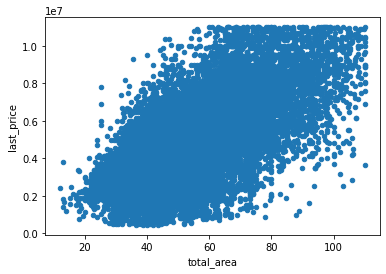

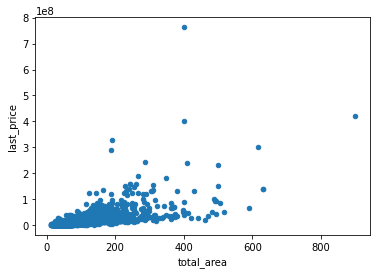

In [18]:
print(good_data['total_area'].describe())
print(good_data['last_price'].describe())
good_data.query('total_area <= 110 and 440000 <= last_price <= 11045000').plot(x='total_area', y='last_price', kind='scatter')
good_data.plot(x='total_area', y='last_price', kind='scatter')
good_data = good_data.query('total_area <= 110 and 440000 <= last_price <= 11045000')

In [19]:
print(good_data['rooms'].describe())
good_data = good_data.query('rooms <= 4')

count    21098.000000
mean         1.900701
std          0.882137
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


In [20]:
print(good_data['floors_total'].describe())
good_data = good_data.query('floors_total <= 31')
good_data.shape[0] / old_good_data.shape[0]

count    21038.000000
mean        10.797604
std          6.644520
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


0.8914067472947167

Избавился от всех мешающихся пропусков

### Создание дополнительных столбцов

In [21]:
#Добавлен новый столбец price_m2 обозначающий цену квадратного метра
good_data['price_m2'] = good_data['last_price'] / good_data['total_area']
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,посёлок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.789474
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,0.0,Тихвин,0.0,0.0,0.0,0.0,0.0,0.0,413.0,45000.000000
23559,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.948718
23561,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,0.0,Тосно,0.0,0.0,0.0,0.0,0.0,0.0,45.0,52542.372881
23562,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,0.0,село Рождествено,0.0,0.0,0.0,0.0,0.0,0.0,NaN,44091.710758


In [22]:
#написал формулу с помощью которой разделил этажи на типы: первый, последний, другой
#Создал новый столбец floor_type и заполнил его этити значениями
def floor_type(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'
good_data['floor_type'] = good_data.apply(floor_type, axis=1)
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,floor_type
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,посёлок Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.789474,другой
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,Тихвин,0.0,0.0,0.0,0.0,0.0,0.0,413.0,45000.000000,другой
23559,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.948718,другой
23561,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,Тосно,0.0,0.0,0.0,0.0,0.0,0.0,45.0,52542.372881,другой
23562,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,село Рождествено,0.0,0.0,0.0,0.0,0.0,0.0,NaN,44091.710758,первый


In [23]:
#Создал столбец center_km в котором находится расстояние центра в км
good_data['center_km'] = good_data['cityCenters_nearest'] / 1000
good_data['center_km'] = good_data['center_km'].round()
good_data['center_km'] = good_data['center_km'].astype('int')
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,floor_type,center_km
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.792079,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,другой,14
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,другой,8
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,0.0,0.0,0.0,0.0,0.0,55.0,95065.789474,другой,0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,52996.0,19143.0,0.0,0.0,0.0,0.0,155.0,99195.710456,другой,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,0.0,0.0,0.0,0.0,0.0,0.0,413.0,45000.000000,другой,0
23559,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,73717.948718,другой,34
23561,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,52542.372881,другой,0
23562,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,44091.710758,первый,0


In [24]:
#Создал столбы отображающие в какой день, месяц и год были размещены объявления
good_data['month'] = pd.DatetimeIndex(good_data['first_day_exposition']).month
good_data['year'] = pd.DatetimeIndex(good_data['first_day_exposition']).year
good_data['weekday'] = good_data['first_day_exposition'].dt.weekday
good_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,floor_type,center_km,month,year,weekday
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,0.0,0.0,81.0,82920.792079,первый,19,12,2018,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,другой,14,8,2015,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,другой,8,6,2018,1
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,0.0,0.0,55.0,95065.789474,другой,0,9,2018,0
6,6,3700000.0,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,0.0,0.0,0.0,155.0,99195.710456,другой,19,11,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23558,2,1350000.0,30.0,2017-07-07,1,NaN,5.0,17.5,4,False,...,0.0,0.0,0.0,413.0,45000.000000,другой,0,7,2017,4
23559,9,4600000.0,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239.0,73717.948718,другой,34,8,2016,4
23561,14,3100000.0,59.0,2018-01-15,3,NaN,5.0,38.0,4,False,...,0.0,0.0,0.0,45.0,52542.372881,другой,0,1,2018,0
23562,18,2500000.0,56.7,2018-02-11,2,NaN,3.0,29.7,1,False,...,0.0,0.0,0.0,NaN,44091.710758,первый,0,2,2018,6


### Исследовательский анализ данных

In [25]:
def show_graph(col:str, bins:int=10, df:pd.DataFrame=good_data):
    sns.set_theme('notebook')
    sns.histplot(df[col], kde=True, bins=bins)
    plt.title(f'Распределение значений в столбце "{col}"')
    plt.ylabel('Количество значений')
    plt.show()
    print('')
    display(df[col].describe())

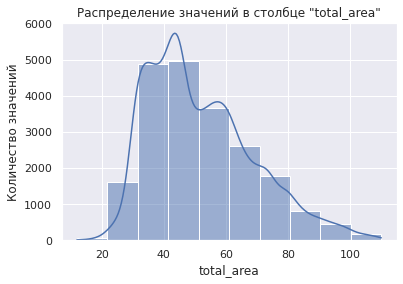

count    21006.000000
mean        52.030993
std         17.071192
min         12.000000
25%         38.800000
50%         48.400000
75%         62.330000
max        110.000000
Name: total_area, dtype: float64

In [26]:
show_graph('total_area')

Площадь большинства квартир находится в пределах 35-50 кв.м, медиана - 48.4

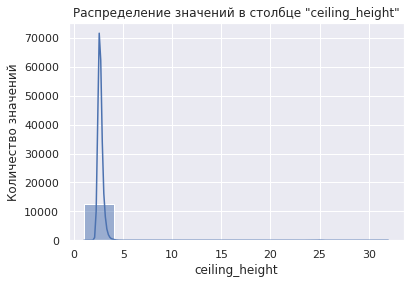

count    12740.000000
mean         2.721821
std          0.994195
min          1.000000
25%          2.500000
50%          2.600000
75%          2.750000
max         32.000000
Name: ceiling_height, dtype: float64

In [27]:
show_graph('ceiling_height')

Половина квартир имеют высоту потолков до 5м, медиана 2.75м

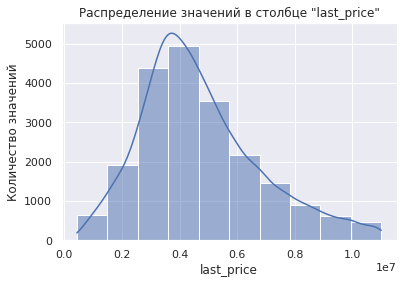

count    2.100600e+04
mean     4.721900e+06
std      2.079632e+06
min      4.400000e+05
25%      3.300000e+06
50%      4.350000e+06
75%      5.885060e+06
max      1.100000e+07
Name: last_price, dtype: float64

In [28]:
show_graph('last_price')

Больще всего квартира в пределах 4-5 млн, средняя цена квартиры 4.35 млн

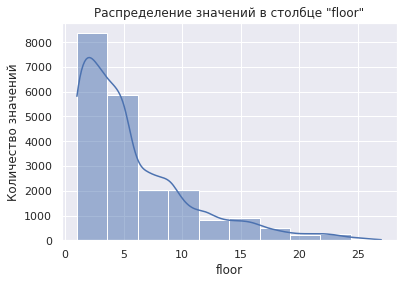

count    21006.000000
mean         5.874702
std          4.875973
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [29]:
show_graph('floor')

Наибольшее количество квартир находятся до 5 этажа, при медианном значении 4

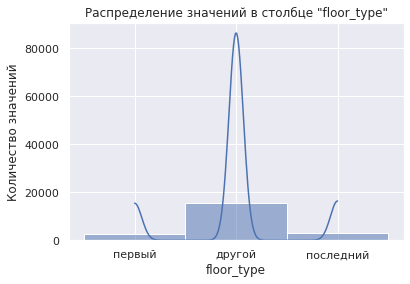

count      21006
unique         3
top       другой
freq       15354
Name: floor_type, dtype: object

In [30]:
show_graph('floor_type')

Доминирующее количество отсносятся к категории "Другой", количество квартир находящихся на первом и последнем этажах примерно равны

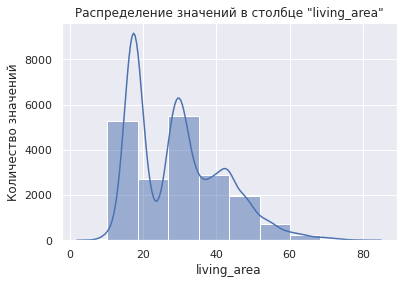

count    19398.000000
mean        29.808200
std         12.344793
min          2.000000
25%         18.000000
50%         29.000000
75%         38.700000
max         85.000000
Name: living_area, dtype: float64

In [31]:
show_graph('living_area')

Большее количество квартир находятся в пределах 15-19 и 25-30 кв.м., медианное значение 29

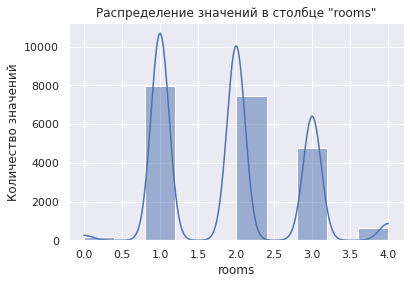

count    21006.000000
mean         1.891936
std          0.867205
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

In [32]:
show_graph('rooms')

Наибольшее количество квартир имеют 1 комнату, но медиана 2

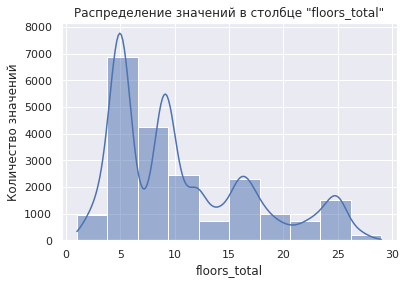

count    21006.000000
mean        10.758640
std          6.570962
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

In [33]:
show_graph('floors_total')

Большинство домов имеют максимум 4-6 этажей, мединное значение 9

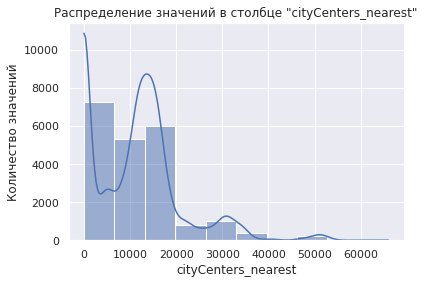

count    21006.000000
mean     11195.388603
std       9857.953099
min          0.000000
25%          0.000000
50%      11738.000000
75%      15565.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [34]:
show_graph('cityCenters_nearest')

Большинство квартир в пределах 5-7км, медианное значение 11.7 км

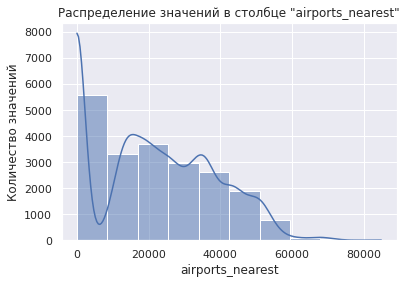

count    21006.000000
mean     21485.473293
std      16945.508345
min          0.000000
25%          0.000000
50%      20439.000000
75%      34530.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [35]:
show_graph('airports_nearest')

Большинство квартир находятся в пределах 10км, однако медианное значение 20.5км

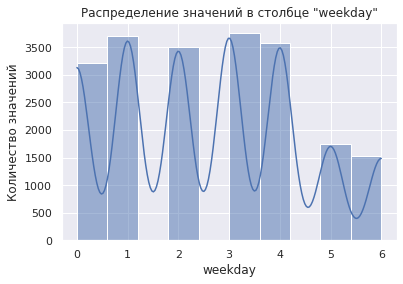

count    21006.000000
mean         2.576121
std          1.794060
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

In [36]:
show_graph('weekday')

Каждый день недели выкладывалось примерно равное кол-во обьявлений квартир

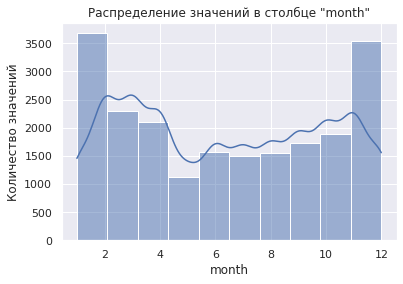

count    21006.000000
mean         6.393697
std          3.491740
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [37]:
show_graph('month')

Большинство квартир выкладывается в феврале-марте 

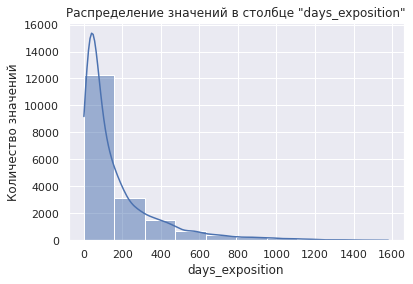

count    18467.000000
mean       170.623761
std        208.209531
min          1.000000
25%         43.000000
50%         90.000000
75%        216.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее количество дней размещения - 170.6237613039476
Медианное значение дней размещения - 90.00000000000001


In [38]:
show_graph('days_exposition')
median_days = good_data['days_exposition'].median()
mean_days = good_data['days_exposition'].mean()
print(f'Среднее количество дней размещения - {mean_days}')
print(f'Медианное значение дней размещения - {median_days}')

В среднем продажа занимает 90 дней, посмотрев на значения Q1 и Q3, я пришел к выводу что случаи когда квартира продавалась меньше чем за 43 дней можно считать быстрыми, а в случаях когда кварьтра продавалась дольше 216 дней - необычно медленными

In [61]:
def scatter(y:str, x:str='last_price'):
    sns.set_theme(style='darkgrid')
    df = good_data.pivot_table(values=x, index=y, aggfunc='median').reset_index()
    sns.regplot(x=df[x], y=df[y])
    plt.title(f'Зависимость цены от {y}')
    plt.show()
    print('')
    print(f'Корреляция: {round(df[x].corr(df[y]), 3)}')

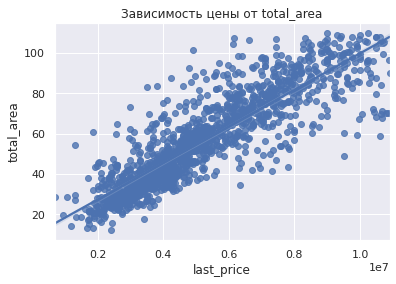


Корреляция: 0.873


In [62]:
scatter('total_area')

Из диграммы видно что увеличение площади приводит к увеличению цены

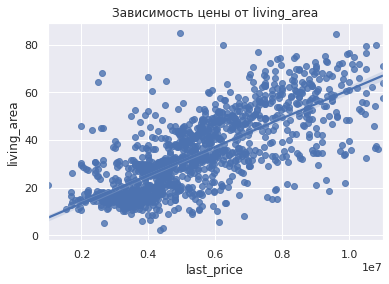


Корреляция: 0.742


In [64]:
scatter('living_area')

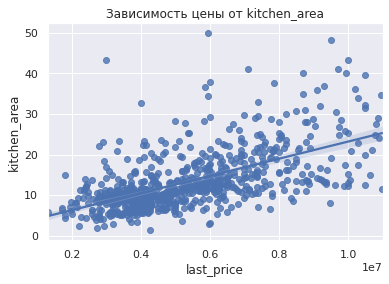


Корреляция: 0.598


In [65]:
scatter('kitchen_area')

Зависимость цены от площади кухни так же прослеживается, так как в квартирах с большей площадью в целом и кухни больше 

0.9996528208293188


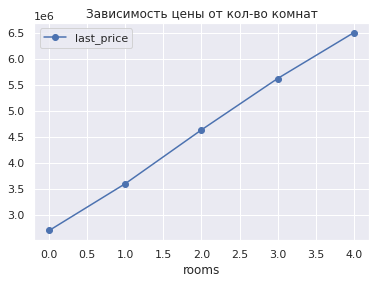

In [41]:
good_data2 = good_data.pivot_table(values='last_price'
                                   , index='rooms'
                                   , aggfunc='median'
                                   ).reset_index()
print(good_data2['last_price'].corr(good_data2['rooms']))
good_data2.plot(x='rooms'
                , y='last_price'
                , style='o-'
                , grid='True'
                , title='Зависимость цены от кол-во комнат'
                );

Чем больше комнат тем выше цена

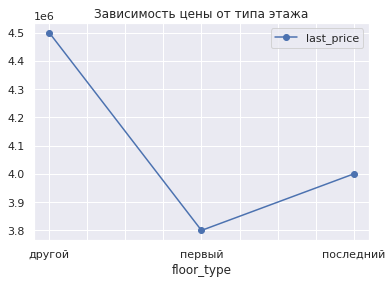

In [ ]:
good_data2 = good_data.pivot_table(values='last_price'
                                   , index='floor_type'
                                   , aggfunc='median'
                                   ).reset_index()
good_data2.plot(x='floor_type'
                , y='last_price'
                , style='o-'
                , grid='True'
                , title='Зависимость цены от типа этажа');

Самая низкая цена на квартиры на первом этаже. Так же цены на последний этаж ниже чем на любой другой кроме первого

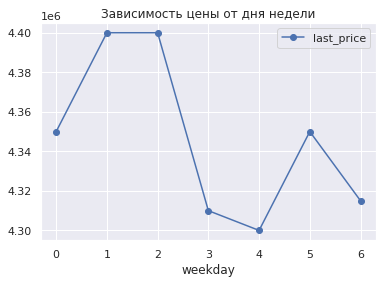

In [43]:
good_data2 = good_data.pivot_table(values='last_price'
                                   , index='weekday'
                                   , aggfunc='median'
                                   ).reset_index()
good_data2.corr()
good_data2.plot(x='weekday'
                , y='last_price'
                , style='o-'
                , grid='True'
                , title='Зависимость цены от дня недели');

Нет никакой зависимости

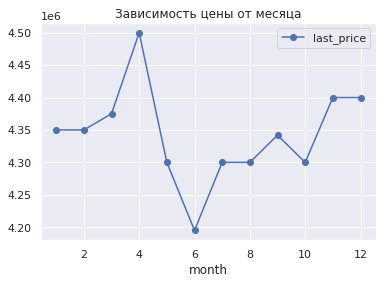

In [44]:
good_data2 = good_data.pivot_table(values='last_price'
                                   , index='month'
                                   , aggfunc='median').reset_index()
good_data2.corr()
good_data2.plot(x='month'
                , y='last_price'
                , style='o-'
                , grid=True
                , title='Зависимость цены от месяца');

Есть тенденция рост цен к Новому году

,year,last_price
year,1.000000,-0.480549
last_price,-0.480549,1.000000


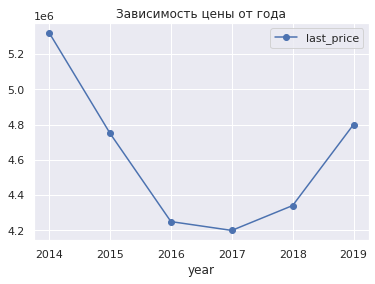

In [49]:
good_data2 = good_data.pivot_table(values='last_price'
                                   , index='year'
                                   , aggfunc='median').reset_index()
good_data2.corr()
good_data2.plot(x='year'
                , y='last_price'
                , style='o-'
                , grid='True'
                , title='Зависимость цены от года'
                );

Особой зависимости нет, но есть тенденция роста цен со временем

In [70]:
#10 городов с самым большим количеством объявлений
top10_locations = (good_data
 .pivot_table(index='locality_name', values='price_m2', aggfunc='count')
 .sort_values(by='price_m2', ascending=False)
 .head(10)
)
display(top10_locations)

,price_m2
locality_name,
Санкт-Петербург,13249
посёлок Мурино,550
посёлок Шушары,432
Всеволожск,394
Пушкин,334
Колпино,334
посёлок Парголово,326
Гатчина,303
деревня Кудрово,298


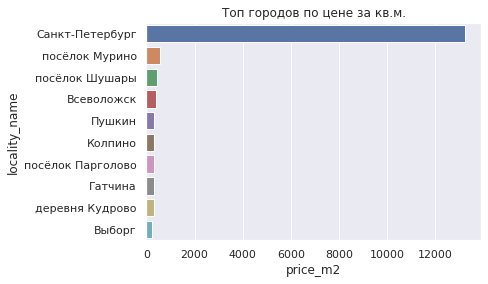

In [80]:
sns.barplot(data=top10_locations
            , x='price_m2'
            , y=top10_locations.index
           )
plt.title('Топ городов по цене за кв.м.')
plt.show()

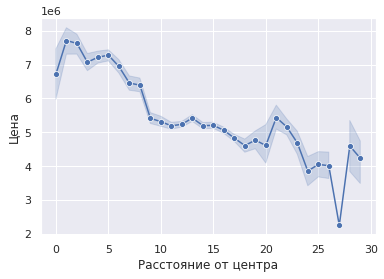

In [89]:
spb = good_data.query('locality_name == "Санкт-Петербург"')
(spb.pivot_table(values='last_price'
                , index='center_km'
                , aggfunc='median')
.reset_index()
)
sns.lineplot(data = spb, x='center_km', y='last_price', marker='o')
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена')
plt.show()

Как видно по графику цена сильно увеличена пока квартиры находятся в пешей доступности, а так же цена падает когда растояние превышает 25 км

### Общий вывод

**Вывод**:

- При осмотре исходных данных было обнаружено крайне много пропусков и аномалии. Далее я избавился от тех, что помешали бы дальнейшим исследованиям. Было отсеяно около 11% изначальных строк 
- Позже были добавлены столбцы:
    - price_m2 (отвечает за цену квадратного метра в квартире)
    - floor_type (отвечает за тип этажа, разделен на три категории):
        - первый (квартиры расположеные на первом этаже)
        - последний (квартиры на последнем этаже)
        - другой (все остальные квартиры не входящие в предыдущие категории)
    - center_km (расстояние до центра в км, изначально было в м)
    - weekday (день недели в который было выложено объявление (начиная с 0 - понедельник и тд))
    - month (месяц в который выложено объявление (начиная с 1 - январь))
    - year (год в который выложено объявление)
- Далее мною был проведен исследовательский анализ данных. Я выяснил:
    - показатели дорогой квартиры:
        - близость к центру
        - большая площадь (увеличение общей площади ведет к увеличению площади кухни, а также жилой площади)
        - квартира находится не на первом и не на последнем этаже
        - цена квартир возрастает под конец года (однако абсолютный максимум - апрель)
        - имеется тенденция роста цен с каждым годом 
        - увеличения количества комнат
    - показатели низкой цены:
        - первый этаж
        - квартира за пределами города
        - квартира была выложена в летний период (в июне цена квартир достигает своего абсолютного минимума)
        - меньшее количество комнат